Frames rendered in time: 466
Frames rendered late: 14
Average render time difference: 41.60 ms


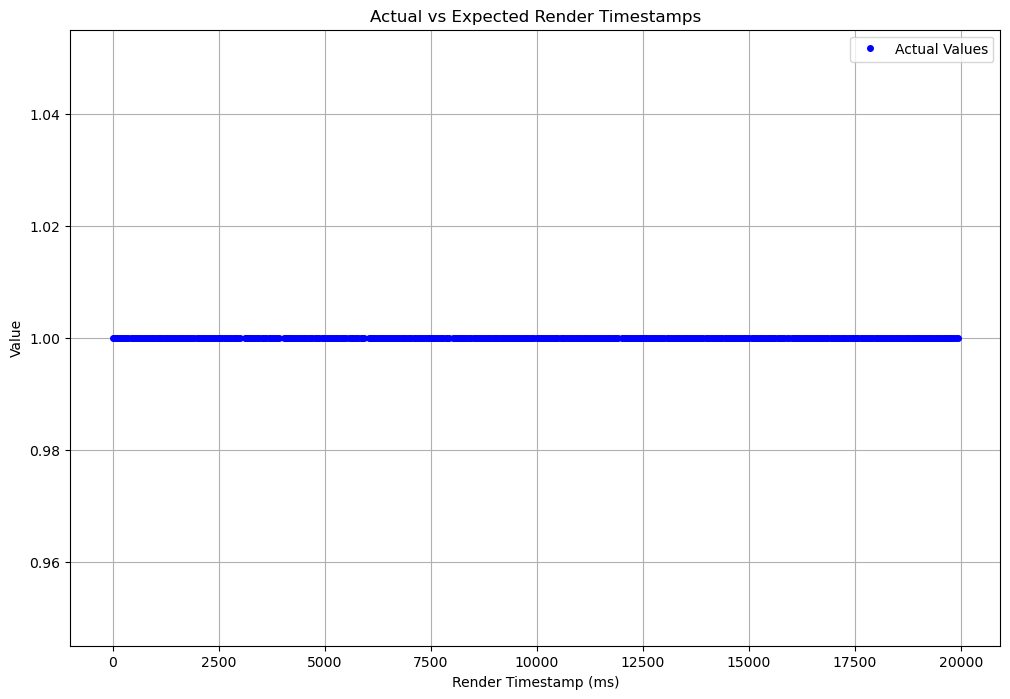

In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

# Directory containing the .raw files
input_directory = 'raw_frames_gop_48_idle'

# Initialize lists to store timestamps
timestamps = []

# Loop through the directory and extract timestamps from filenames
for filename in sorted(os.listdir(input_directory)):
    if filename.endswith('.raw'):
        # Extract the timestamp from the filename
        timestamp = int(filename.split('.')[0])
        timestamps.append(timestamp)

# Convert timestamps to numpy array
timestamps = np.array(timestamps)

# Subtract the first timestamp from all timestamps
timestamps_adjusted = timestamps - timestamps[0]

# Compute the differences between consecutive timestamps
time_differences = np.diff(timestamps_adjusted)

# Calculate the average time difference
average_time_difference = np.mean(time_differences)

# Create a constant value array (same length as timestamps)
constant_value = 1
values = np.full_like(timestamps_adjusted, constant_value)

# Calculate the expected frame interval for 24 FPS
fps = 24
frame_interval = 1000 / fps

# Generate expected timestamps
expected_timestamps = np.arange(0, timestamps_adjusted[-1] + frame_interval, frame_interval)
expected_values = np.full_like(expected_timestamps, constant_value)

# Count frames rendered in time
frames_rendered_in_time = 0
frames_rendered_late = 0
for index in range(len(timestamps_adjusted)):
    expected_time = expected_timestamps[index]
    actual_time = timestamps_adjusted[index]
    if actual_time <= expected_time:
        # print("In time", actual_time, expected_time)
        frames_rendered_in_time += 1
    else:
        # print("Late", actual_time, expected_time)
        frames_rendered_late += 1
print("Frames rendered in time:", frames_rendered_in_time)
print("Frames rendered late:", frames_rendered_late)


# Plot the actual and expected values
plt.figure(figsize=(12, 8))
plt.plot(timestamps_adjusted, values, 'o', label='Actual Values', color='blue', markersize=4)
# plt.plot(expected_timestamps, expected_values, 'o', label='Expected 24 FPS Values', color='red', markersize=0.1)
plt.xlabel('Render Timestamp (ms)')
plt.ylabel('Value')
plt.title('Actual vs Expected Render Timestamps')
plt.legend()
plt.grid(True)

# Print the average render time difference
print(f"Average render time difference: {average_time_difference:.2f} ms")

plt.savefig(f'plots/actual-render-times-gop-48-idle.pdf', bbox_inches='tight')

In [16]:
# Configuration
output_directory = 'numbered_raw_frames'  # Path to store new .raw files
frame_rate = 24  # Frames per second
timestamp_interval = 1000 / frame_rate  # Interval in milliseconds
number_of_original_frames = 480

# Ensure output directory exists
os.makedirs(output_directory, exist_ok=True)

# List and sort original .raw files by timestamp
files = [f for f in os.listdir(input_directory) if f.endswith('.raw')]
files.sort(key=lambda f: int(f.split('.')[0]))

# Find the earliest timestamp
earliest_timestamp = int(files[0].split('.')[0])

# Normalize timestamps and rename files
normalized_files = []
for file in files:
    old_timestamp = int(file.split('.')[0])
    new_timestamp = old_timestamp - earliest_timestamp
    new_filename = f'{new_timestamp}.raw'
    normalized_files.append(new_filename)
    shutil.copy(os.path.join(input_directory, file), os.path.join(output_directory, new_filename))

print(f"Renamed and copied {len(normalized_files)} files.")

# Create a series of new files based on frame timestamps
current_time = 0
frame_number = 0

while frame_number < number_of_original_frames:
    # Find the latest file before or at the current timestamp
    closest_file = None
    for file in reversed(normalized_files):
        file_timestamp = int(file.split('.')[0])
        print(file_timestamp, current_time)
        if file_timestamp <= current_time:
            closest_file = file
            break
    
    if closest_file is None:
        break  # No more files to process

    # Construct output filename
    output_filename = f'frame-{frame_number}.raw'
    output_file_path = os.path.join(output_directory, output_filename)

    # Copy the closest file to the new series
    shutil.copy(os.path.join(output_directory, closest_file), output_file_path)
    
    # Move to the next timestamp
    current_time += timestamp_interval
    frame_number += 1

# Loop through the list and delete each file
for file_name in normalized_files:
    file_path = os.path.join(output_directory, file_name)
    
    try:
        if os.path.exists(file_path):
            os.remove(file_path)
            # print(f"Deleted: {file_path}")
        else:
            print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")

print(f"Processed {frame_number} frames.")


Renamed and copied 480 files.
19928 0
19876 0
19844 0
19792 0
19750 0
19711 0
19677 0
19643 0
19589 0
19543 0
19500 0
19463 0
19428 0
19378 0
19343 0
19297 0
19248 0
19215 0
19167 0
19126 0
19082 0
19043 0
18998 0
18960 0
18927 0
18879 0
18833 0
18792 0
18751 0
18716 0
18668 0
18624 0
18586 0
18540 0
18501 0
18461 0
18416 0
18378 0
18346 0
18291 0
18249 0
18210 0
18178 0
18131 0
18082 0
18050 0
18006 0
17986 0
17919 0
17874 0
17835 0
17792 0
17749 0
17712 0
17666 0
17633 0
17582 0
17544 0
17503 0
17462 0
17424 0
17378 0
17332 0
17294 0
17249 0
17217 0
17166 0
17131 0
17082 0
17049 0
17000 0
16962 0
16928 0
16874 0
16833 0
16793 0
16751 0
16710 0
16676 0
16630 0
16581 0
16553 0
16500 0
16464 0
16421 0
16378 0
16335 0
16295 0
16250 0
16211 0
16166 0
16138 0
16093 0
16060 0
16034 0
16013 0
15933 0
15888 0
15833 0
15795 0
15751 0
15714 0
15676 0
15626 0
15584 0
15554 0
15507 0
15462 0
15417 0
15378 0
15334 0
15290 0
15250 0
15212 0
15168 0
15126 0
15088 0
15063 0
15006 0
14959 0
14915 0
14

In [17]:
### Received video frames just stitched together ###

# Configuration
output_directory = 'numbered_raw_frames'  # Path to store new .raw files
frame_rate = 24  # Frames per second
timestamp_interval = 1000 / frame_rate  # Interval in milliseconds
number_of_original_frames = 240

# Ensure output directory exists
os.makedirs(output_directory, exist_ok=True)

# List and sort original .raw files by timestamp
files = [f for f in os.listdir(input_directory) if f.endswith('.raw')]
files.sort(key=lambda f: int(f.split('.')[0]))

# Normalize timestamps and rename files
normalized_files = []
for index, file in enumerate(files):
    old_timestamp = int(file.split('.')[0])
    new_filename = f'frame-{index}.raw'
    normalized_files.append(new_filename)
    shutil.copy(os.path.join(input_directory, file), os.path.join(output_directory, new_filename))

print(f"Renamed and copied {len(normalized_files)} files.")

Renamed and copied 480 files.
